# Perceptrón Multicapa (PMC)
La figura a continuación, muestra una red neuronal de 3 capas:
- Capa de entrada _(in)_, no se cuenta como capa en sí y corresponde a los datos de entrada
- Capa oculta _(h)_
- Capa de salida _(o)_

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1dHD4UEgUOlDIG1gda1HD-YaaQxjzyVD9" width=700></center>
</pre>

Llamamos a la salida del _i-ésimo_ nodo en la _l-ésima_ capa: $a_i^{(l)}$.

$a_0^{(in)}$ y $a_0^{(h)}$ son las **unidades de bias** los cuales igualamos a 1.

Cada nodo en la capa $l$ está conectado a todos los nodos en la capa  $l+1$ a través de un coeficiente de la matriz de pesos. Como ejemplo, la conexión entre el _k-ésimo_ nodo en la capa $l$ al _j-ésimo_ nodo en la capa $l+1$ sería $w_{k,j}^{(l)}$. Cuando todas las neuronas en una capa están conectadas a cada neurona de la capa anterior, la capa se denomina _densa_ o _fully connected_.

Denominamos $W^{(h)}$ la matriz de pesos que conecta las entradas con la capa oculta y $W^{(out)}$ la matriz de pesos que conecta la capa oculta a la capa de salida.

La matriz de pesos $W^{(h)}$ tiene dimensiones $d$ x $m$ donde _d_ es el número de nodos de la capa oculta y _m_ es el número de entradas mas la unidad de bias.

## Algoritmo de entrenamiento de un Perceptrón Multicapa

Para empezar, vamos a resumir este procedimiento en 3 pasos generales:
1. Iniciando en la capa de entrada, propagamos hacia adelante los datos de entrenameinto a través de la red para obtener la salida.
2. En base a la salida de la red, calculamos el error que queremos minimizar usando una función de costo.
3. Hacemos la retropropagación del error, hallamos su derivada respecto a cada uno de los pesos en la red y actualizamos los pesos.

Después de repetir estos pasos y los pesos convergen, hacemos la propagación hacia adelante para obtener la salida de la red y aplicamos una función umbral para obtener la predicción de la etiqueta de clase.

## Funciones de activación

Para que el algoritmo de retropropagación funcione correctamente, es necesario cambiar las funciones de activación de cada perceptrón con la función logística, igual como hicimos con el Adaline.

Existen funciones de activación adicionales que funcionan muy bien con el algoritmo:

**Función Logística o Sigmoidea:** función continua y diferenciable en forma de 'S'. Sus valores de salida varían entre 0 y 1.

$$\sigma(z) = \frac{1}{(1 + exp(-z))}$$

**Función tangente hiperbólica:** similar a la anterior pero sus valores de salida varían entre -1 y 1.

$$\tanh(z) = 2\sigma(2z) -1$$

**Función unidad lineal rectificada (ReLU)** es continua pero no diferenciable en z=0, su derivada es 0 para $z<0$.

$$ReLU(z) = max(0,z)$$

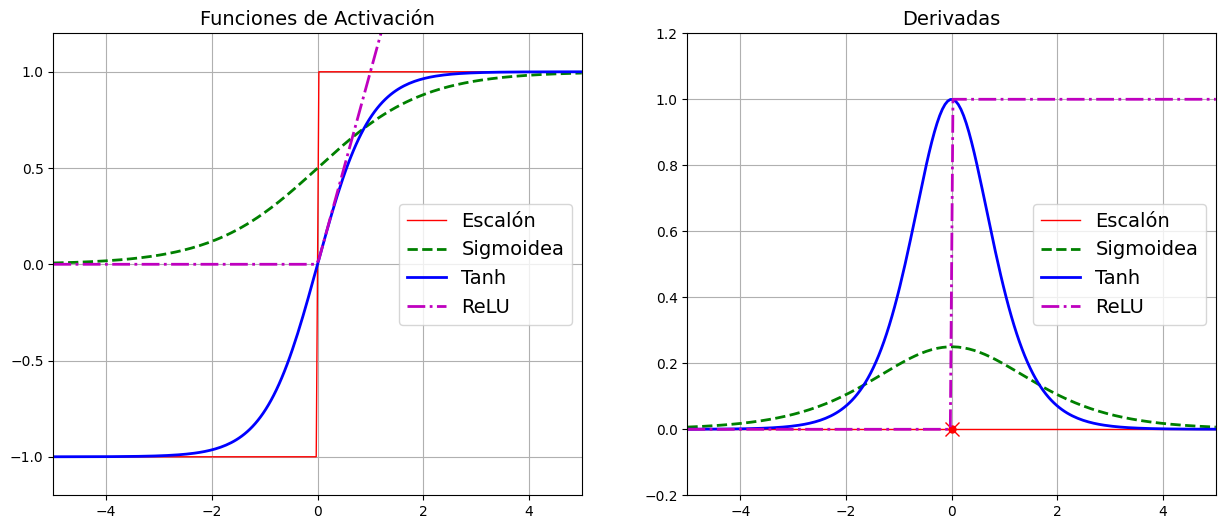

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Escalón")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funciones de Activación", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Escalón")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoidea")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivadas", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

### Uso de la clase _MLPClassifier_ de sklearn

A continuación vamos a utilizar la clase _MLPClassifier_ para resolver el problema del XOR.

Los datos de entrada (X) y salida (y) se encuentran en el archivo `datos_xor.mat` en la carpeta "data"

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

**cargamos y graficamos los datos**

In [ ]:
# Cargamos los datos en variables de entrada (X) y salida (y)



In [ ]:
#Modificamos las etiquetas de clase para tener clases 0 y 1
#-------------------------------------------------------


In [ ]:
# Grafiquemos los datos usando plt.scatter
#-----------------------------------------------------------------------------


Entrenamos un clasificador _MLPClassifier_ con una capa oculta de 2 neuronas, con función de activación sigmoidea, usando el algoritmo de optimización `adam` y un coeficiente de aprendizaje `0.2` y graficar la curva de error. Ver la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) de la clase.

Como vimos en clase de teoría. Las neuronas en la capa oculta, estarían realizando una transformación. Es decir, mapean el espacio de entrada (X) a un nuevo espacio (X') donde los patrones pueden ser linealmente separados por el nodo en la capa de salida.
<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1dGTYgeMbSbARS9i9___OxsHlibS5ErzQ" width=700></center>
</pre>

Con los pesos $w_h$ podemos obtener dos rectas que separan la representación de los datos entrada.
Podemos obtener las rectas a la salida de la capa oculta a partir de los pesos $w_h$ de la capa, de forma similar como hacíamos con el perceptrón simple:
$$\begin{pmatrix}1\\x_1\\x_2\end{pmatrix} \begin{pmatrix}w_{00}&w_{01}&w_{02}\\ w_{10}&w_{11}&w_{12}\\ \end{pmatrix} = 0$$

Esto nos dará como resultado dos rectas, de las cuales despejamos la pendiente y ordenada para graficarlas
$$ w_{00} + x_1 w_{01} + x_2 w_{02} = 0$$
$$ w_{10} + x_1 w_{11} + x_2 w_{12} = 0$$

### Obtener los coeficientes de los pesos de la capa oculta y la capa de salida para graficar las rectas

In [ ]:
# Obtenemos los parámetros de las rectas que se forman con los pesos w_h de la capa oculta
#---------------------------------------------------------------------------



# Graficamos las 2 rectas junto a los datos
#------------------------------------------------------------------------------------



### Visualizando el espacio transformado
El espacio transformado corresponde a la salida de la capa oculta con los pesos entrenados de la red. Esta salida $\vec{a}^{(h)}$ se obtiene aplicando la función de activación $\phi()$ a la entrada de la capa oculta $\vec{z}^{(h)}$

$$ \vec{z}^{(h)} = \vec{x}^{(in)}.(\vec{W}^{(h)})^T $$

$$ \vec{a}^{(h)} = \phi(\vec{z}^{(h)})$$

$\vec{x}^{(in)}$ corresponde a los datos de entrada X mas el bias

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Agrego la columna para bias a la entrada X


#Calculamos la salida de la capa oculta


In [ ]:
# Ahora vamos a representar la salida de la capa oculta


### Como se puede observar, ahora los patrones de entrada a la neurona de la capa de salida, son linealmente separables
Ahora la frontera de decisión podemos encontrarla de la misma forma que hicimos con el perceptrón simple, excepto que esta vez trabajamos con un espacio _X'_ resultado de la transformación:

$$ w_0^{(o)} + x_1' w_1^{(o)} + x_2' w_2^{(o)} = 0$$

$w^{(o)}$ corresponde a los pesos en el nodo de salida

In [ ]:
# Con los pesos del nodo en la capa de salida w_out, armar la recta que separe
# los datos en el campo transformado
# --------------------------------------------------------------------------------------------------------


# Graficar los datos y la recta
#-----------------------------------------------------------------------



Graficar utilizando la función plot_decision_regions